# Import all necessary libraries

In [71]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Extraction of data

In [31]:
data_list=[]
for i in range(10,181,10):
    
    resp=requests.get('https://in.indeed.com/jobs?q=Data%20Science&start={}&vjk=f0e7efd8776dc46a'.format(i))
    resp.content
    soup=BeautifulSoup(resp.content,'html.parser')
    soup.prettify()
    jobs=soup.find_all('div',attrs={'class':"job_seen_beacon"})
    
    for job in jobs:
        temp_dict={}
        for span in job.h2.find_all("span"):
            if(span.find("class")):
                continue
            else:    
                temp_dict['profile']= span.text.replace('\n','')
        
        temp_dict['company']=job.find('span',attrs={'class':'companyName'}).text.replace('\n','')

        try:
            temp_dict['rating']=job.find('span',attrs={'class':'ratingNumber'}).text.replace('\n','')
        except Exception as e:
            rating='Null'  
        temp_dict['location']=job.find('div',attrs={'class':'companyLocation'}).text.replace('\n','') 

        salary=job.find('div',attrs={'class':'salary-snippet'})
        try:
            temp_dict['salary']=salary.span.text.replace('\n','')

        except Exception as e:
            salary='Null'
        data_list.append(temp_dict)
        
job_list = pd.DataFrame(data_list)



In [32]:
#save the data in csv file.
job_list.to_csv("D:\\project\\.data_job.csv")

In [103]:
#read the csv file 
df=pd.read_csv('D:\\project\\.data_job.csv')
df

,Unnamed: 0,profile,company,rating,location,salary
0,0,Associate Analyst - Quality Control,Johnson & Johnson Family of Companies,4.2,"Mumbai, Maharashtra",NaN
1,1,Data science || Freelancer,Logiccircle Pvt Ltd,NaN,"Noida, Uttar Pradesh•Remote",NaN
2,2,Design and Development Associate,Life-Lab,NaN,"Pune, Maharashtra•Remote","₹20,000 - ₹30,000 a month"
3,3,JUNIOR DATA ANALYST – INTERNSHIP,impress.ai,NaN,India,NaN
4,4,"Data Analyst_Research, Excel",Springer Nature,3.6,"Pune, Maharashtra",NaN
...,...,...,...,...,...,...
265,265,"Associate Analyst - OCT - Remote, WFH (Based i...",Larvol,NaN,Remote,NaN
266,266,"Senior Analyst- APLD, Data Science",Novartis,4.1,"Hyderabad, Telangana",NaN
267,267,Software Development Engineer II,Ola Cabs,3.6,"Bengaluru, Karnataka",NaN
268,268,Assistant Professor in Computer Science,Lingaya's Vidyapeeth,5.0,"Faridabad, Haryana","₹30,000 - ₹70,000 a month"


# Data Cleaning 

In [104]:
Remote_location=[]
for i in range(0,270):
    str1 = df['location'][i]
    str2 = str1.split() 
    str2="".join(str2)

    if 'Remote' in str2: 
        Remote_location.append("Remote")
    else:
        Remote_location.append("Office")
        
        
df["Remote_location"]=Remote_location   
df    
    

,Unnamed: 0,profile,company,rating,location,salary,Remote_location
0,0,Associate Analyst - Quality Control,Johnson & Johnson Family of Companies,4.2,"Mumbai, Maharashtra",NaN,Office
1,1,Data science || Freelancer,Logiccircle Pvt Ltd,NaN,"Noida, Uttar Pradesh•Remote",NaN,Remote
2,2,Design and Development Associate,Life-Lab,NaN,"Pune, Maharashtra•Remote","₹20,000 - ₹30,000 a month",Remote
3,3,JUNIOR DATA ANALYST – INTERNSHIP,impress.ai,NaN,India,NaN,Office
4,4,"Data Analyst_Research, Excel",Springer Nature,3.6,"Pune, Maharashtra",NaN,Office
...,...,...,...,...,...,...,...
265,265,"Associate Analyst - OCT - Remote, WFH (Based i...",Larvol,NaN,Remote,NaN,Remote
266,266,"Senior Analyst- APLD, Data Science",Novartis,4.1,"Hyderabad, Telangana",NaN,Office
267,267,Software Development Engineer II,Ola Cabs,3.6,"Bengaluru, Karnataka",NaN,Office
268,268,Assistant Professor in Computer Science,Lingaya's Vidyapeeth,5.0,"Faridabad, Haryana","₹30,000 - ₹70,000 a month",Office


In [105]:
import re
new_salary= []
for i in range(270):
    string= df['salary'][i]
    if type(string)==float:
        new_salary.append(None)
    else:
        string = string.replace(",",'')
        string = string.replace("-",' ')
        length = len(re.findall("₹", string))
        if(length==2): # this condition is for salaries which are in range
            if 'month' in string:
                x = string.split('₹')[1].split(' ')[0]
                y = string.split('₹')[2].split(' ')[0]
                salary_amount=(int(x)+ int(y))/2
                new_salary.append(int(salary_amount))
            else: #for yearly based salary
                x = string.split('₹')[1].split(' ')[0]
                y = string.split('₹')[2].split(' ')[0]            
                salary_amount=(int(x)+ int(y))/2
                salary_amount= salary_amount / 12
                new_salary.append(salary_amount)
        else:
            if 'month' in string:
                salary_amount = string.split('₹')[1].split(' ')[0]
                new_salary.append(int(salary_amount))
            else: #for yearly based salary
                salary_amount = string.split('₹')[1].split(' ')[0]
                salary_amount= int(x) / 12
                new_salary.append(salary_amount)

df["new_salary"]=new_salary   
df




,Unnamed: 0,profile,company,rating,location,salary,Remote_location,new_salary
0,0,Associate Analyst - Quality Control,Johnson & Johnson Family of Companies,4.2,"Mumbai, Maharashtra",NaN,Office,NaN
1,1,Data science || Freelancer,Logiccircle Pvt Ltd,NaN,"Noida, Uttar Pradesh•Remote",NaN,Remote,NaN
2,2,Design and Development Associate,Life-Lab,NaN,"Pune, Maharashtra•Remote","₹20,000 - ₹30,000 a month",Remote,25000.0
3,3,JUNIOR DATA ANALYST – INTERNSHIP,impress.ai,NaN,India,NaN,Office,NaN
4,4,"Data Analyst_Research, Excel",Springer Nature,3.6,"Pune, Maharashtra",NaN,Office,NaN
...,...,...,...,...,...,...,...,...
265,265,"Associate Analyst - OCT - Remote, WFH (Based i...",Larvol,NaN,Remote,NaN,Remote,NaN
266,266,"Senior Analyst- APLD, Data Science",Novartis,4.1,"Hyderabad, Telangana",NaN,Office,NaN
267,267,Software Development Engineer II,Ola Cabs,3.6,"Bengaluru, Karnataka",NaN,Office,NaN
268,268,Assistant Professor in Computer Science,Lingaya's Vidyapeeth,5.0,"Faridabad, Haryana","₹30,000 - ₹70,000 a month",Office,50000.0


In [106]:
df.drop(['salary','Unnamed: 0'],axis=1,inplace=True)
df

,profile,company,rating,location,Remote_location,new_salary
0,Associate Analyst - Quality Control,Johnson & Johnson Family of Companies,4.2,"Mumbai, Maharashtra",Office,NaN
1,Data science || Freelancer,Logiccircle Pvt Ltd,NaN,"Noida, Uttar Pradesh•Remote",Remote,NaN
2,Design and Development Associate,Life-Lab,NaN,"Pune, Maharashtra•Remote",Remote,25000.0
3,JUNIOR DATA ANALYST – INTERNSHIP,impress.ai,NaN,India,Office,NaN
4,"Data Analyst_Research, Excel",Springer Nature,3.6,"Pune, Maharashtra",Office,NaN
...,...,...,...,...,...,...
265,"Associate Analyst - OCT - Remote, WFH (Based i...",Larvol,NaN,Remote,Remote,NaN
266,"Senior Analyst- APLD, Data Science",Novartis,4.1,"Hyderabad, Telangana",Office,NaN
267,Software Development Engineer II,Ola Cabs,3.6,"Bengaluru, Karnataka",Office,NaN
268,Assistant Professor in Computer Science,Lingaya's Vidyapeeth,5.0,"Faridabad, Haryana",Office,50000.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   profile          270 non-null    object 
 1   company          270 non-null    object 
 2   rating           160 non-null    float64
 3   location         270 non-null    object 
 4   Remote_location  270 non-null    object 
 5   new_salary       57 non-null     float64
dtypes: float64(2), object(4)
memory usage: 12.8+ KB


# Data Visualization

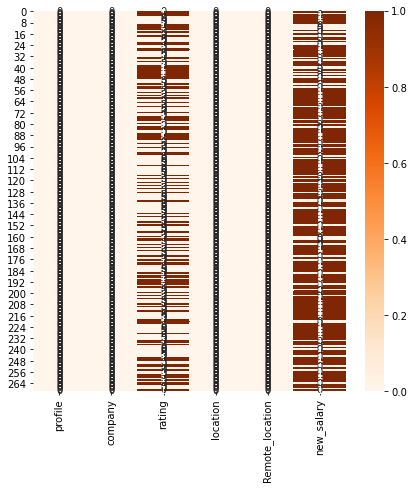

In [107]:
#check null values using heatmap for each column
plt.figure(figsize=(7,7))
sns.heatmap(df.isnull(),annot=True,cmap='Oranges')
plt.show()

from the above heatmap in 'new_salary' column we conclude that the many company had not disclose their salary. And also there are various companies whoes rating is not mentioned. 

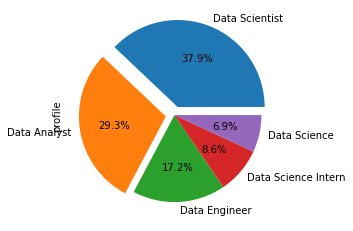

In [108]:
#top 5 job profile
df['profile'].value_counts().head(5).plot(kind='pie',autopct='%1.1f%%',explode=(0.1,0.1,0,0,0))
plt.show()

<AxesSubplot:>

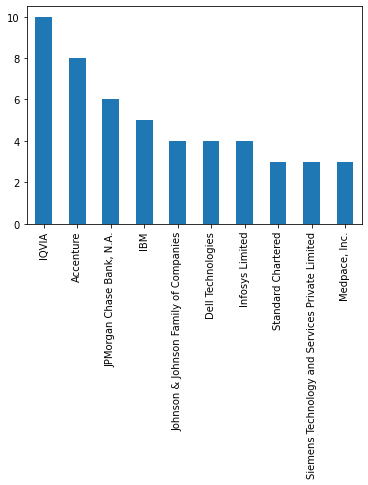

In [109]:
#company who has maximum number of job.
df['company'].value_counts().head(10).plot(kind='bar')

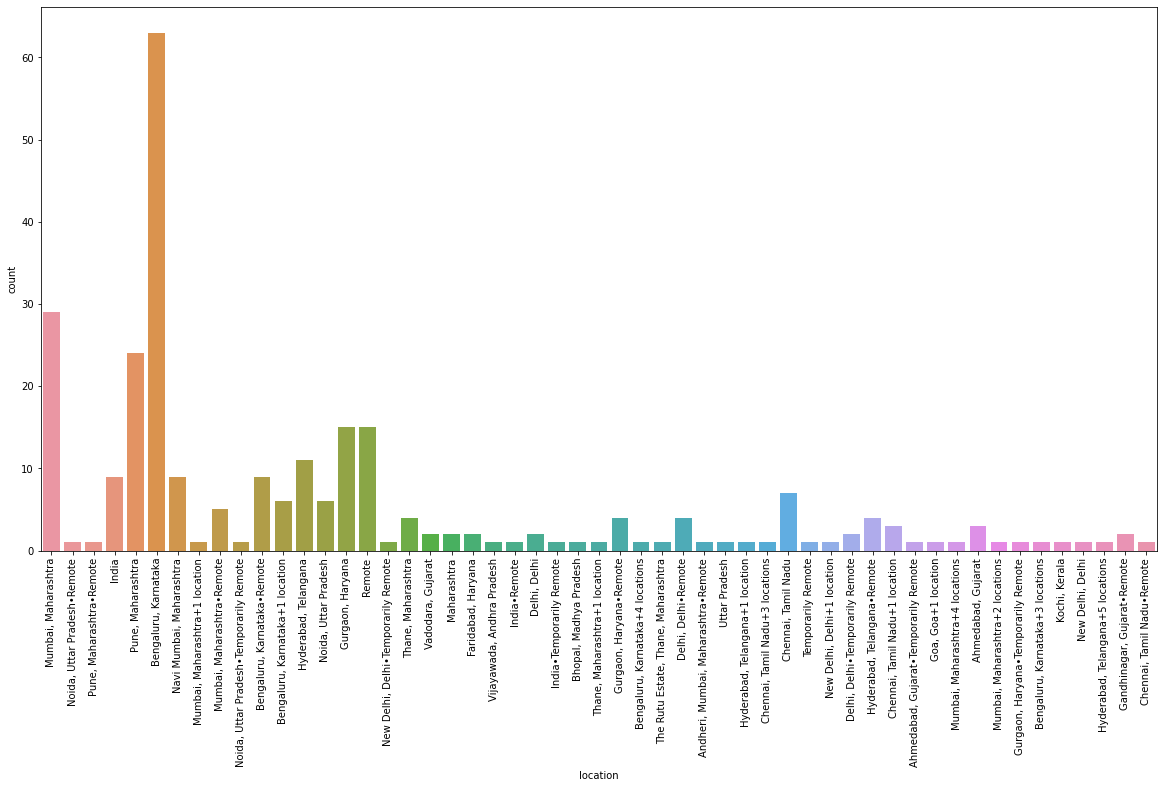

In [110]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='location')
plt.xticks(rotation=90)
plt.show()

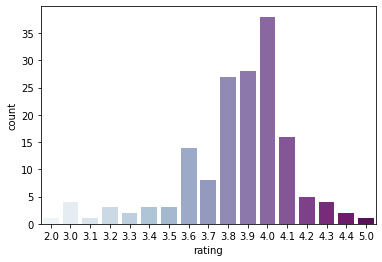

In [111]:
#countplot fo rating
sns.countplot(data=df,x='rating',palette='BuPu')
plt.show()

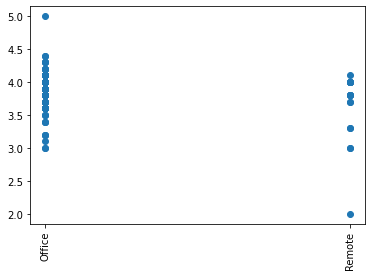

In [112]:
plt.scatter(x=df['Remote_location'],y=df['rating'])
plt.xticks(rotation=90)
plt.show()


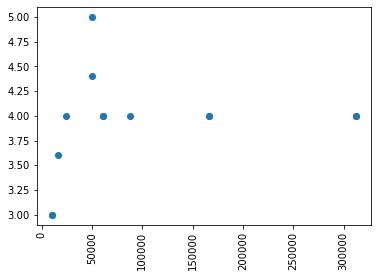

In [113]:
plt.scatter(x=df['new_salary'],y=df['rating'])
plt.xticks(rotation=90)
plt.show()

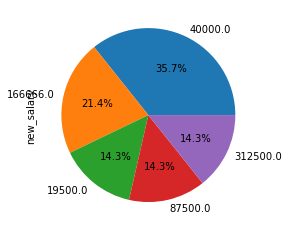

In [114]:
df['new_salary'].value_counts().head(5).plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [115]:
df['rating'].max()

5.0

In [119]:
df['rating'].min()

2.0

In [116]:
df['new_salary'].max()

312500.0

In [122]:
df['new_salary'].min()

2083.0

In [ ]:
df.iloc[df[]]

In [133]:
df.loc[df['new_salary'] == 2083.0]

,profile,company,rating,location,Remote_location,new_salary
54,Data Scientist,Redian Software,NaN,"Gurgaon, Haryana",Office,2083.0


<AxesSubplot:>

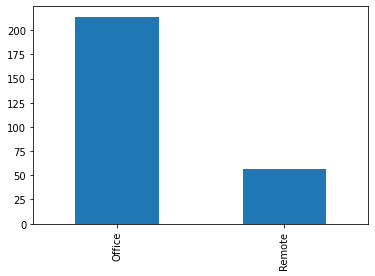

In [118]:
df['Remote_location'].value_counts().plot(kind='bar')